In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon

common_labels = {
    "baseline": "Random Initialisation",
    "weightinit": "Pretrained: Weight Initialisation",
    "pretrained": "Pretrained: Two Frozen Layers",
    "pretrainedsamearch": "Pretrained: Fine-tuning only",
    # "pretrainedplusonelayer": "Pretrained: Freezing, Extra layer + fine tuning",
    "pretrainedonefrozenlayer": "Pretrained: One Frozen Layer",
    "CRISPRedict": "X-CRISP",
    # "X-CRISP MSE": "X-CRISP MSE",
    "inDelphi": "inDelphi",
    "FORECasT": "FORECasT",
    "Lindel": "Lindel",
    # "mESC WT": "mESC WT",
}

transfer_models_order = ["baseline", "weightinit", "pretrainedonefrozenlayer", "pretrained", "pretrainedsamearch"]
baseline_models_order = ["CRISPRedict", "FORECasT", "Lindel", "inDelphi", "CROTON"]


def plot_transfer_learning(measurement, what="overall", labels=common_labels):
    # tl_datafile = "/Users/colm/OneDrive - Delft University of Technology/My Drafts/CRISPR Deletion Prediction/Results/Transfer_Learning/{}/{}_{}.tsv"
    tl_datafile = os.environ["OUTPUT_DIR"] + "Results/Transfer_Learning/{}.tsv"
   
    file_mapping = {
        "inDelphi USO2 WT": "inDelphi U2OS WT",
        "FORECasT HAP1": "FORECasT HAP1 WT",
        "inDelphi NHEJ-deficient": "inDelphi mECS -NHEJ",
        "FORECasT TREX": "FORECasT TREX WT",
    }
    m = {
        "corr": "Pearson's Correlation",
        "kl_div": "KL Divergence",
        "mse": "Mean Squared Error",
        "js": "Jensen Shannon",
        "Deletion": "Deletion",
        "1BP Deletion": "1BP Deletion",
        "1BP Insertion": "1BP Insertion",
        "1BP Frameshift": "1BP Frameshift",
        "2BP Frameshift": "2BP Frameshift",
        "Frameshift": "Frameshift"
    }
    d = []
    # for k in file_mapping.keys():  
    #     df = pd.read_csv(tl_datafile.format(what, k, measurement), sep="\t")
    #     d.append(df)
    # d = pd.concat(d).rename(columns={"0": m[measurement], "Corr": m[measurement]})
    d = pd.read_csv(tl_datafile.format(what), sep="\t")
    print(tl_datafile.format(what))


    transfer_d = d.loc[d["Method"].str.split("_", expand=True).iloc[:,1].isin(transfer_models_order), :]
    transfer_d = transfer_d.reset_index()
    parsed = transfer_d["Method"].str.split("_", expand=True)
    transfer_d["Method"] = parsed.iloc[:,1]
    transfer_d["Num Samples"] = parsed.iloc[:,2].astype(int)
    transfer_d = transfer_d[["Dataset", "Num Samples", "Method", m[measurement]]]
    transfer_d = transfer_d.loc[transfer_d["Method"].isin(list(labels.keys())), :]
    experiments = transfer_d["Num Samples"].unique()

    baseline_d = d.loc[d["Method"].isin(list(labels.keys())), :]
    tmp_baseline_d = []
    for i in range(len(experiments)):
        tmp_baseline_d.append(baseline_d.copy())
        tmp_baseline_d[i]["Num Samples"] = experiments[i]
    baseline_d = pd.concat(tmp_baseline_d)[["Dataset", "Num Samples", "Method", m[measurement]]]

    d = pd.concat([transfer_d, baseline_d])

    d["Method"] = d["Method"].apply(lambda x: labels[x])
    d["Dataset"] = d["Dataset"].apply(lambda x: file_mapping[x])

    return d

In [32]:
d0 = plot_transfer_learning("corr", "overall")
d0["Comparison"] = "Overall"
d2 = plot_transfer_learning("corr", "mh")
d2["Comparison"] = "MH Deletions"
d3 = plot_transfer_learning("corr", "mhless")
d3["Comparison"] = "MH-less Deletions"

/Users/colm/repos/output/local/Results/Transfer_Learning/overall.tsv
/Users/colm/repos/output/local/Results/Transfer_Learning/mh.tsv
/Users/colm/repos/output/local/Results/Transfer_Learning/mhless.tsv


In [33]:
d0 = plot_transfer_learning("corr", "overall")

/Users/colm/repos/output/local/Results/Transfer_Learning/overall.tsv


In [34]:
d0["Method"].unique()

array(['Pretrained: Two Frozen Layers', 'Random Initialisation',
       'Pretrained: Fine-tuning only', 'Pretrained: One Frozen Layer',
       'Pretrained: Weight Initialisation', 'X-CRISP', 'Lindel',
       'FORECasT', 'inDelphi'], dtype=object)

/Users/colm/repos/output/local/Results/Transfer_Learning/insertions.tsv


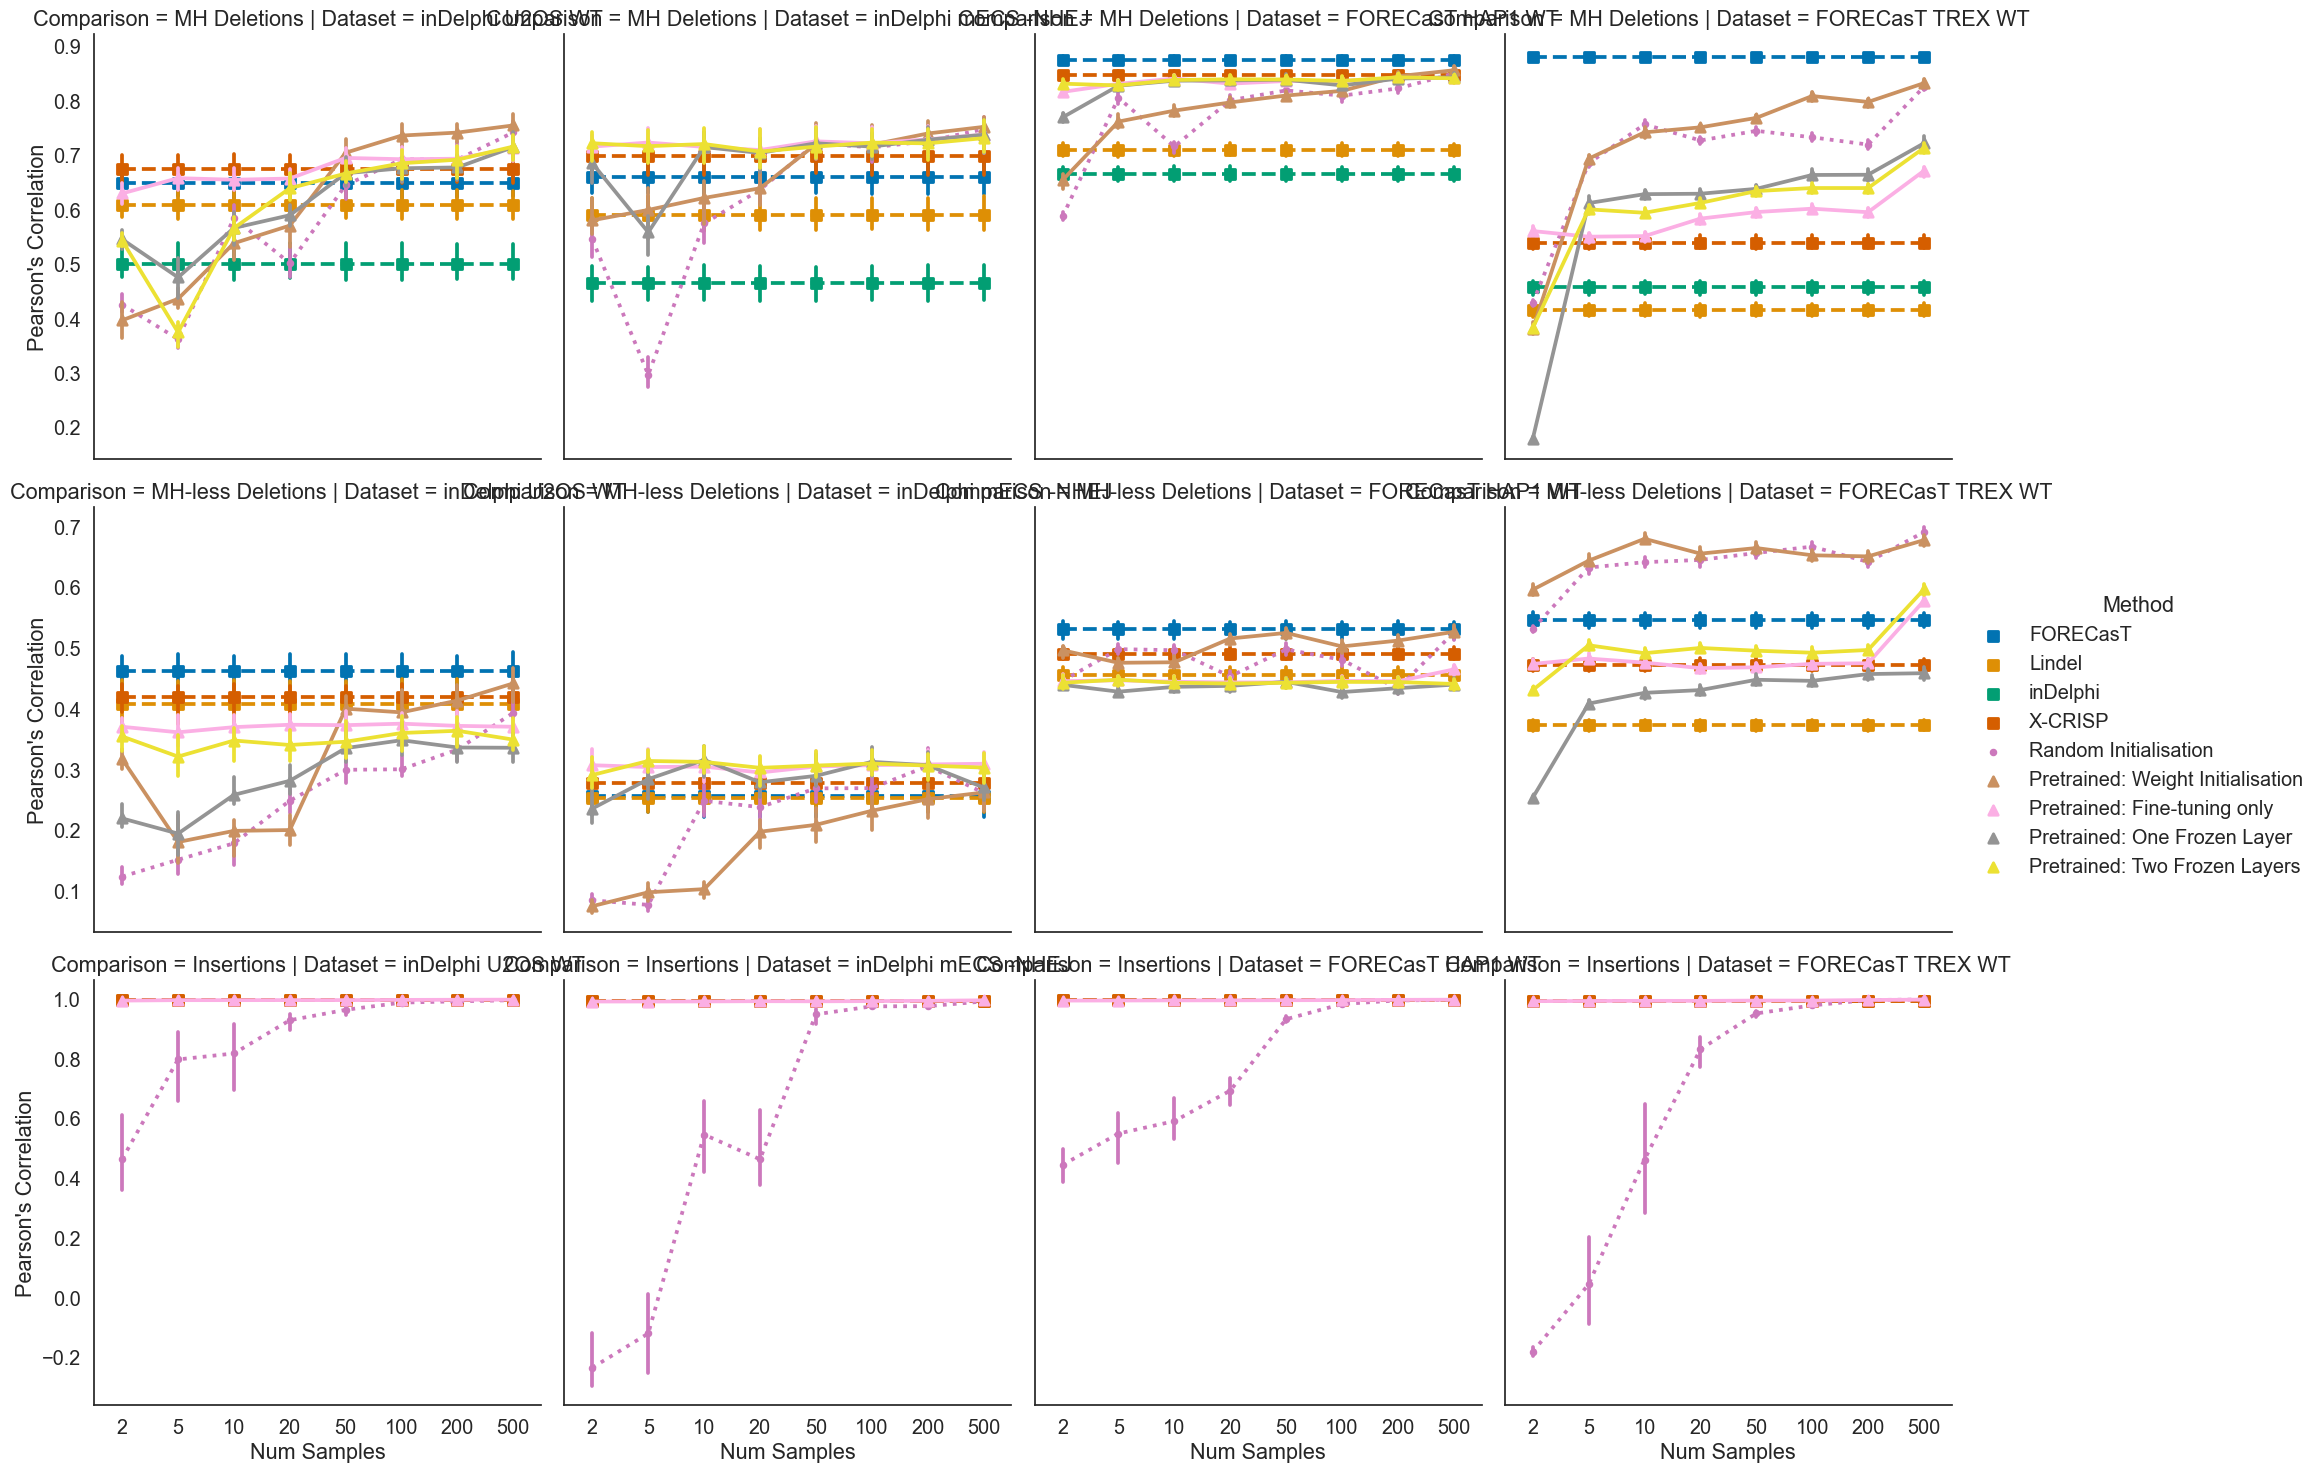

In [35]:
insertion_labels = {
    "baseline": "Random Initialisation",
    # "weightinit": "Pretrained: Weight Initialisation",
    "pretrained": "Pretrained: Fine-tuning only",
    "CRISPRedict": "X-CRISP",
    # "FORECasT": "FORECasT",
    "Lindel": "Lindel",
}

d4 = plot_transfer_learning("corr", "insertions", labels=insertion_labels)
d4["Comparison"] = "Insertions"

d = pd.concat([d0, d2, d3, d4])

g = sns.catplot(data=d, x="Num Samples",\
    y="Pearson's Correlation",\
    hue="Method",\
    kind="point",\
    col="Dataset",\
    row="Comparison",\
    hue_order=['FORECasT', 'Lindel', 'inDelphi', 'X-CRISP', 'Random Initialisation', 'Pretrained: Weight Initialisation', 'Pretrained: Fine-tuning only',
       'Pretrained: One Frozen Layer', 'Pretrained: Two Frozen Layers'],\
    linestyles=(["--"] * 4 + [":"] + ["-"] * 4 ) ,\
    linewidth=.5, \
    markers=([","] * 4 + ["."] + ["^"] * 4 ) ,\
    palette="colorblind",\
    sharey="row",
    estimator=np.median)

plt.show()

/Users/colm/repos/output/local/Results/Transfer_Learning/overall.tsv
/Users/colm/repos/output/local/Results/Transfer_Learning/mh.tsv
/Users/colm/repos/output/local/Results/Transfer_Learning/mhless.tsv
/Users/colm/repos/output/local/Results/Transfer_Learning/insertions.tsv


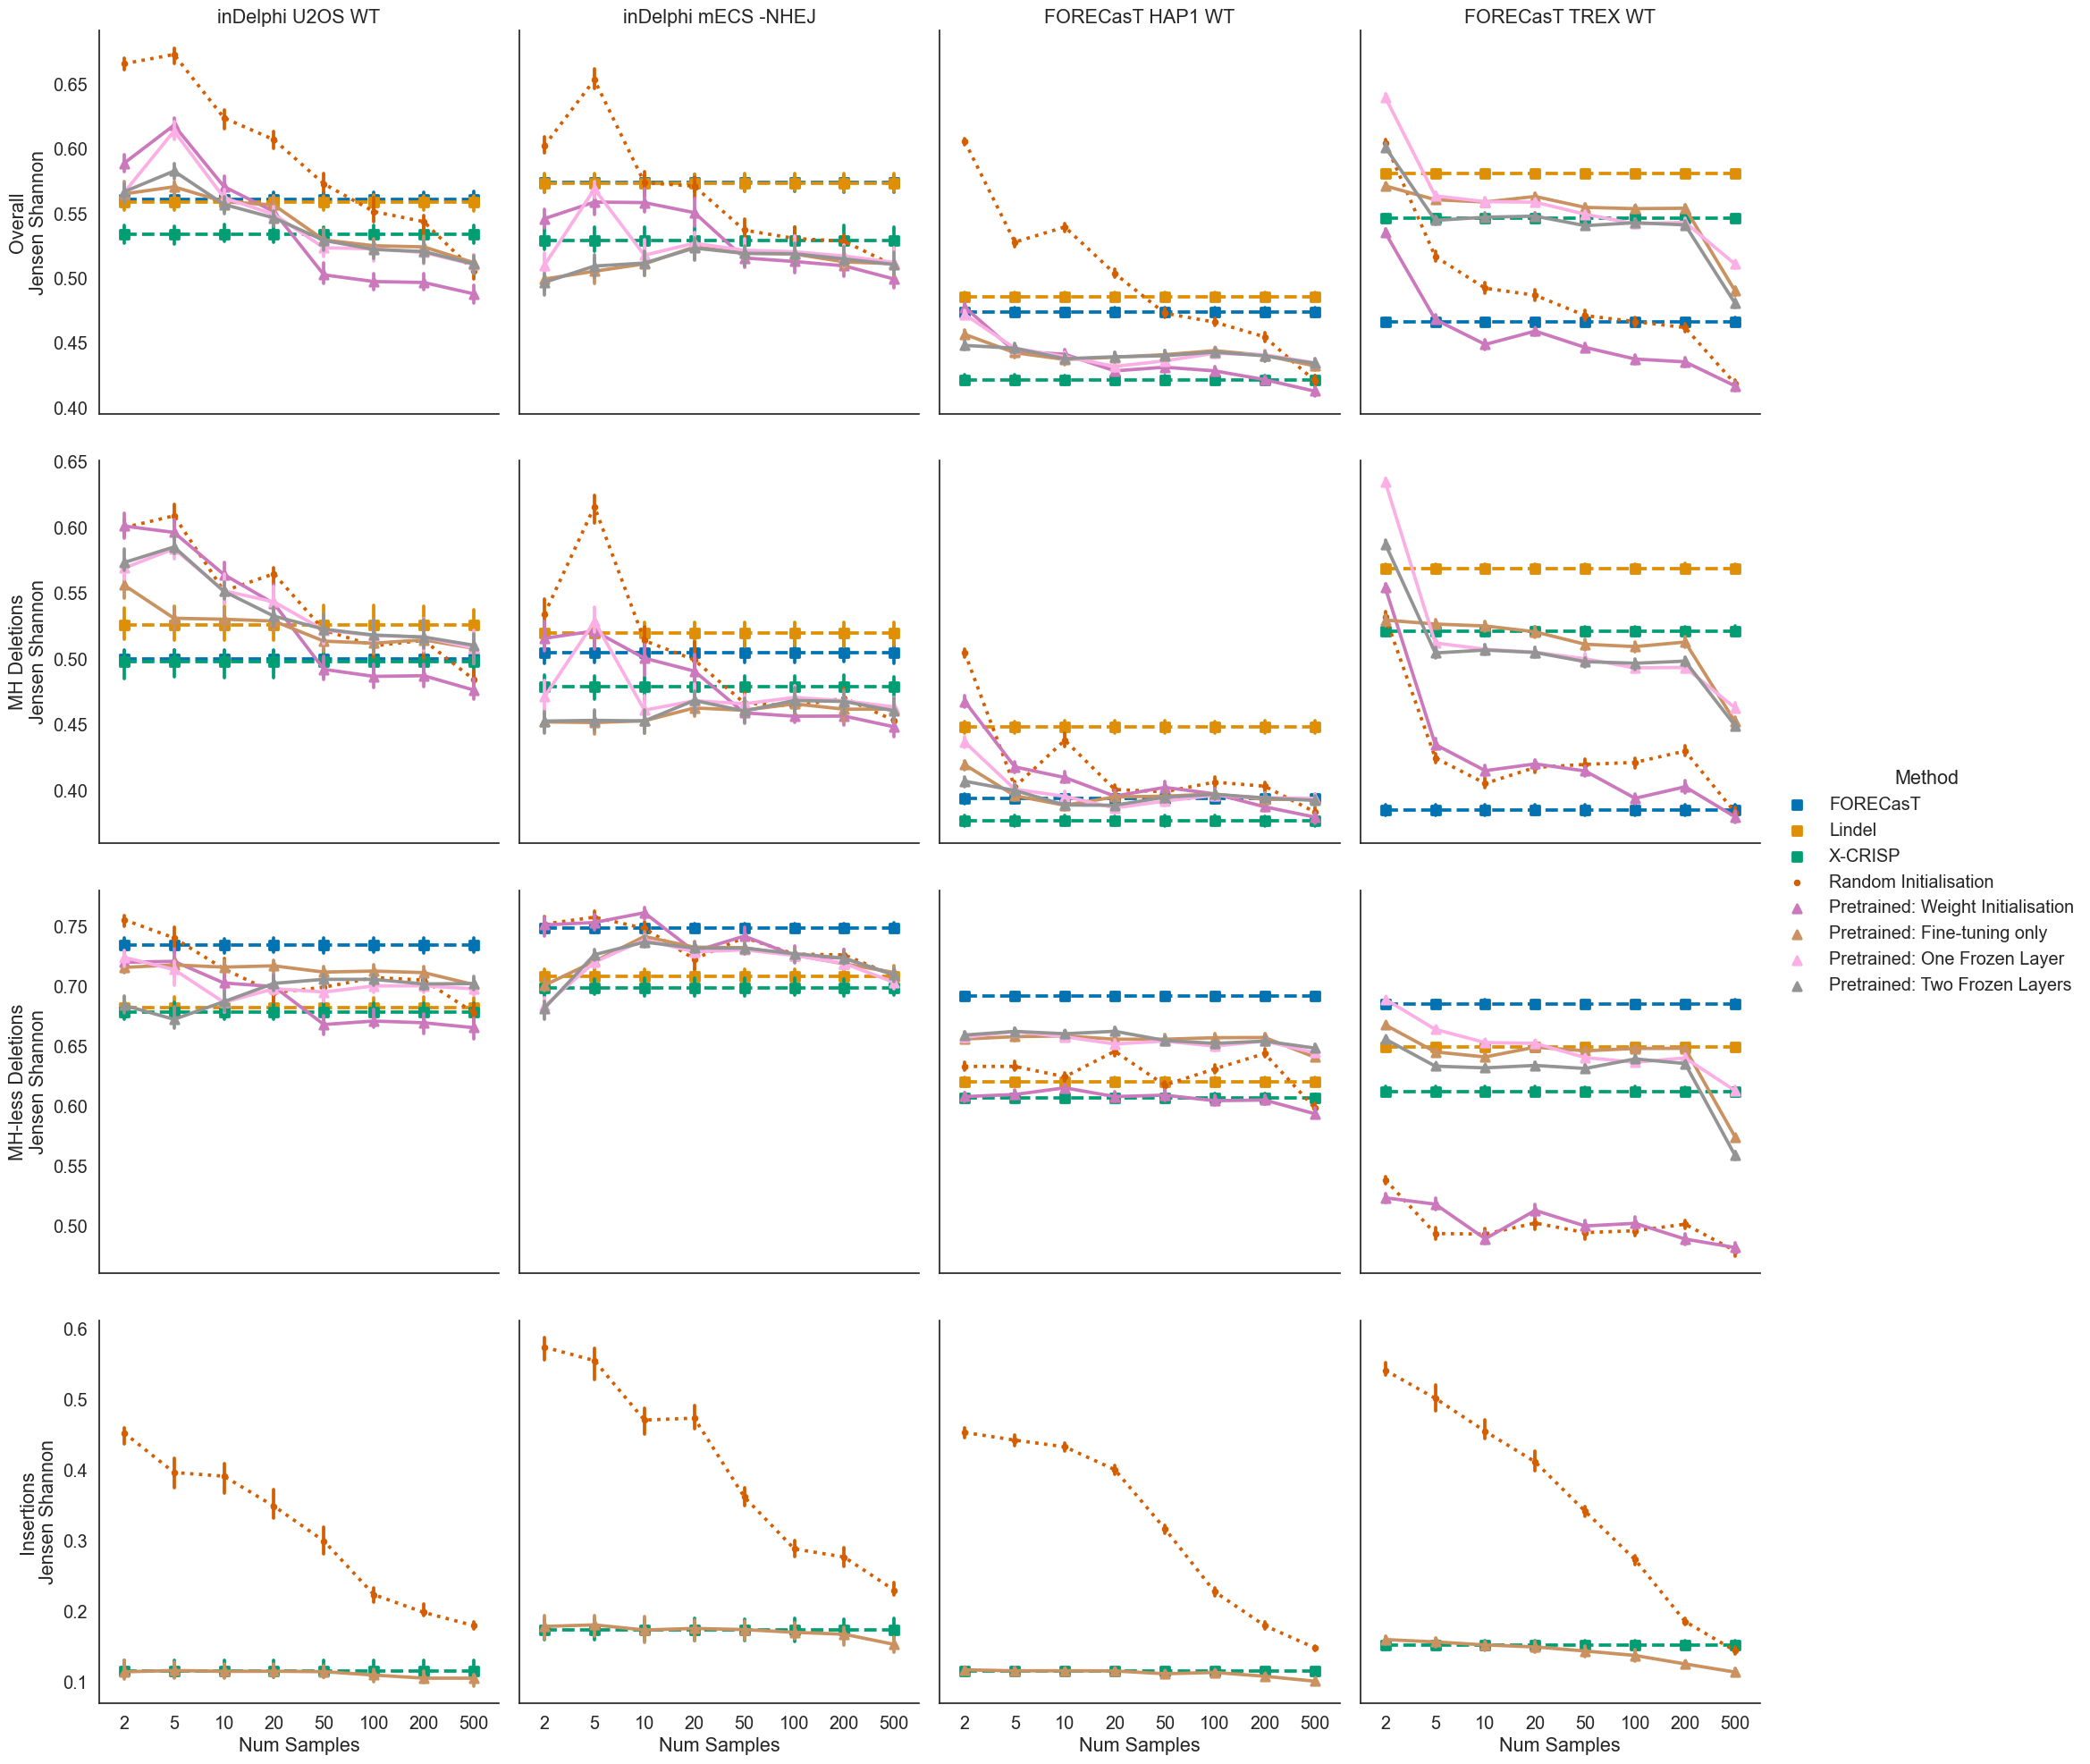

In [36]:
d0 = plot_transfer_learning("js", "overall")
d0["Comparison"] = "Overall"
d2 = plot_transfer_learning("js", "mh")
d2["Comparison"] = "MH Deletions"
d3 = plot_transfer_learning("js", "mhless")
d3["Comparison"] = "MH-less Deletions"

insertion_labels = {
    "baseline": "Random Initialisation",
    "CRISPRedict": "X-CRISP",
    # "weightinit": "Pretrained: Weight Initialisation",
    "pretrained": "Pretrained: Fine-tuning only",    
}

d4 = plot_transfer_learning("js", "insertions", labels=insertion_labels)
d4["Comparison"] = "Insertions"

d = pd.concat([d0, d2, d3, d4])
col_order = ['inDelphi U2OS WT', 'inDelphi mECS -NHEJ', 'FORECasT HAP1 WT', 'FORECasT TREX WT']
g = sns.catplot(data=d, x="Num Samples",\
    y="Jensen Shannon",\
    hue="Method",\
    kind="point",\
    col="Dataset",\
    row="Comparison",\
    sharey="row",\
    col_order = col_order,
    hue_order=['FORECasT', 'Lindel', 'X-CRISP', 'Random Initialisation', 'Pretrained: Weight Initialisation', 'Pretrained: Fine-tuning only',
       'Pretrained: One Frozen Layer', 'Pretrained: Two Frozen Layers'],\
    linestyles=(["--"] * 3 + [":"] + ["-"] * 4 ) ,\
    linewidth=.5, \
    markers=([","] * 3 + ["."] + ["^"] * 4 ) ,\
    palette="colorblind",\
    estimator=np.median)

g.axes[0,0].set_ylabel("Overall\nJensen Shannon")
g.axes[1,0].set_ylabel("MH Deletions\nJensen Shannon")
g.axes[2,0].set_ylabel("MH-less Deletions\nJensen Shannon")
g.axes[3,0].set_ylabel("Insertions\nJensen Shannon")

for i, title in enumerate(col_order): 
    g.axes[0,i].set_title(title)
    for j in range(1, 4):
        g.axes[j,i].set_title("")

def get_stars(p):
    if p <= 1.00e-04: return "****"
    if (1.00e-04 < p) and (p <= 1.00e-03): return "***"
    if (1.00e-03 < p) and (p <= 1.00e-02): return "**"
    if (1.00e-02 < p) and (p <= 5.00e-02): return "*"
    return "ns"

def annotate_pvalue(dataset, method, comparison, ax, y_pos, n):
    num_samples = [2, 5, 10, 20, 50, 100, 200, 500]
    x_pos = num_samples.index(n)
    y = d.loc[(d.Comparison == comparison) & (d.Dataset == dataset) \
        & (d.Method == "X-CRISP") & (d["Num Samples"] == n), "Jensen Shannon"]
    x = d.loc[(d.Comparison == comparison) & (d.Dataset == dataset) \
        & (d.Method == method) & (d["Num Samples"] == n), "Jensen Shannon"]
    median_n = d.loc[(d.Comparison == comparison) & (d.Dataset == dataset) \
        & (d.Method == method) & (d["Num Samples"] == n), "Jensen Shannon"].median()
    ax.annotate(get_stars(wilcoxon(x, y)[1]), xy=(x_pos, median_n), xytext=(x_pos-2, median_n-y_pos), arrowprops=dict(facecolor='black', arrowstyle="-"))

# annotate_pvalue(col_order[0], "Pretrained: Weight Initialisation", "Overall", g.axes[0, 0], 0.015, 50)
# annotate_pvalue(col_order[1], "Pretrained: Weight Initialisation", "Overall", g.axes[0, 1], 0.035, 50)

# annotate_pvalue(col_order[0], "Pretrained: Weight Initialisation", "MH Deletions", g.axes[1, 0], 0.015, 100)
# annotate_pvalue(col_order[0], "Pretrained: Weight Initialisation", "MH-less Deletions", g.axes[2, 0], 0.015, 50)
# annotate_pvalue(col_order[0], 'Pretrained: Fine-tuning only', "Insertions", g.axes[3, 0], 0.035, 10)

plt.show()


In [37]:
comparison = "Insertions"
dataset = "inDelphi U2OS WT"
n = 10

y = d.loc[(d.Comparison == comparison) & (d.Dataset == dataset) \
        & (d.Method == "X-CRISP") & (d["Num Samples"] == n), "Jensen Shannon"]
x = d.loc[(d.Comparison == comparison) & (d.Dataset == dataset) \
    & (d.Method == "Pretrained: Weight Initialisation") & (d["Num Samples"] == n), "Jensen Shannon"]

d.loc[(d.Comparison == comparison) & (d.Dataset == dataset) & (d["Num Samples"] == n)].Method.unique()

array(['Pretrained: Fine-tuning only', 'Random Initialisation', 'X-CRISP'],
      dtype=object)

/Users/colm/repos/output/local/Results/Transfer_Learning/indels.tsv


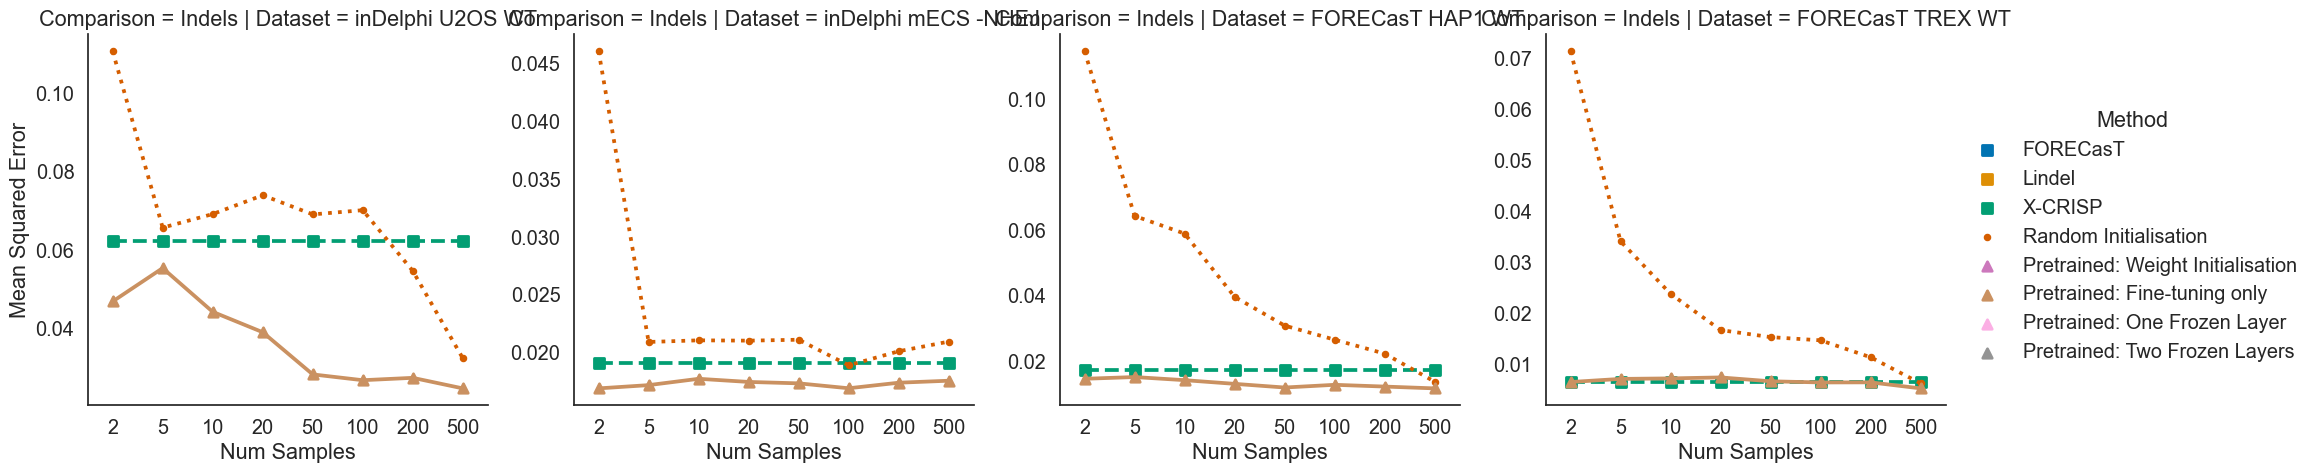

In [38]:
insertion_labels = {
    "baseline": "Random Initialisation",
    # "weightinit": "Pretrained: Weight Initialisation",
    "pretrained": "Pretrained: Fine-tuning only",
    "CRISPRedict": "X-CRISP",
    # "FORECasT": "FORECasT",
}

dindels = plot_transfer_learning("mse", "indels", labels=insertion_labels)
dindels["Comparison"] = "Indels"

d = pd.concat([dindels])

g = sns.catplot(data=d, x="Num Samples",\
    y="Mean Squared Error",\
    hue="Method",\
    kind="point",\
    col="Dataset",\
    row="Comparison",\
    sharey=False,\
    hue_order=['FORECasT', 'Lindel', 'X-CRISP', 'Random Initialisation', 'Pretrained: Weight Initialisation', 'Pretrained: Fine-tuning only',
       'Pretrained: One Frozen Layer', 'Pretrained: Two Frozen Layers'],\
    linestyles=(["--"] * 3 + [":"] + ["-"] * 4 ) ,\
    linewidth=.5, \
    markers=([","] * 3 + ["."] + ["^"] * 4 ) ,\
    palette="colorblind",\
    estimator=np.median)

plt.show()


In [39]:
d3.groupby(["Dataset", "Num Samples", "Method"]).size().reset_index().drop(["Num Samples", "Method"], axis=1).drop_duplicates()

,Dataset,0
0,FORECasT HAP1 WT,3740
64,FORECasT TREX WT,3303
128,inDelphi U2OS WT,841
192,inDelphi mECS -NHEJ,871


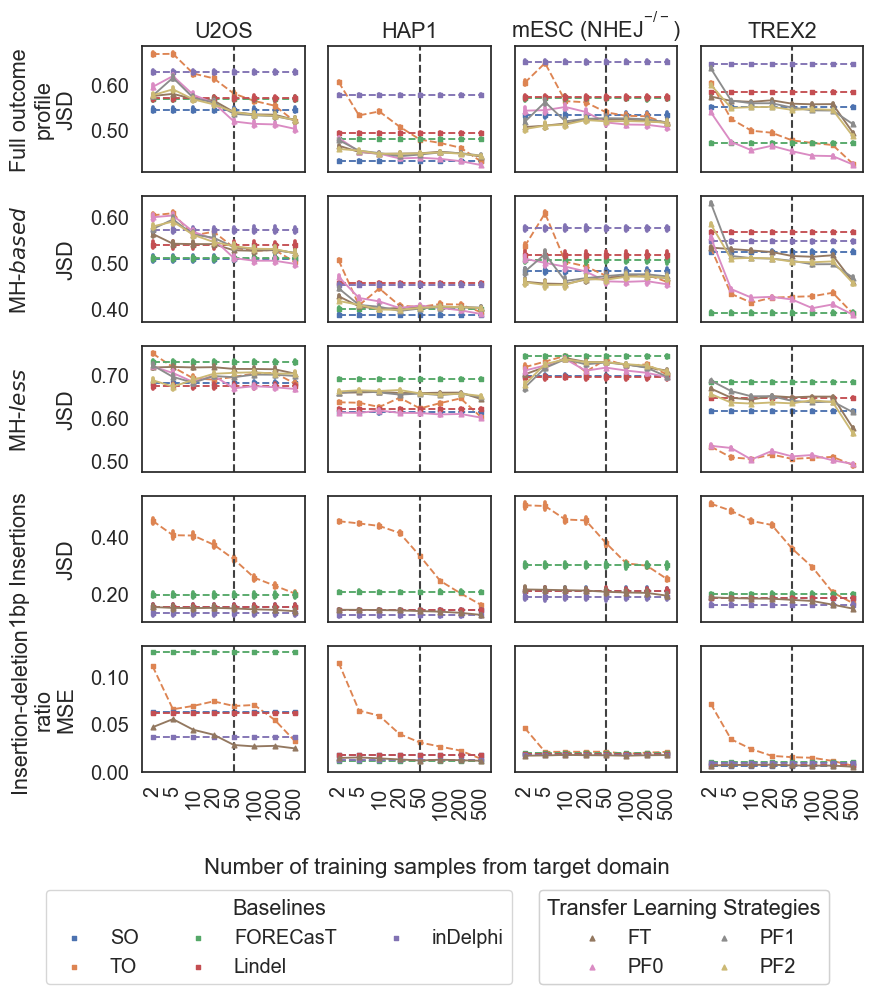

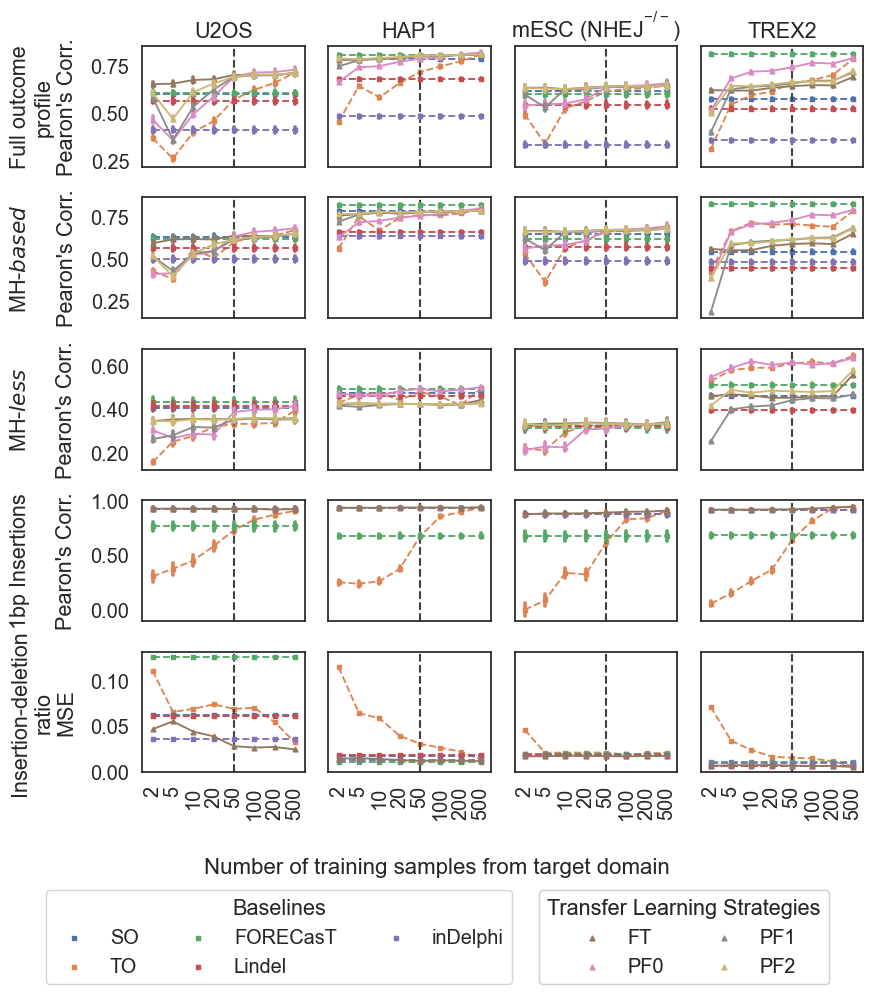

In [40]:
from matplotlib.ticker import FuncFormatter

common_labels = {
    "CRISPRedict": "SO",
    "baseline": "TO",
    "FORECasT": "FORECasT",
    "Lindel": "Lindel",
    "inDelphi": "inDelphi",
    "pretrainedsamearch": "FT",
    "weightinit": "PF0",
    "pretrainedonefrozenlayer": "PF1",
    "pretrained": "PF2",   
}

insertion_labels = {
    "baseline": "TO",
    "CRISPRedict": "SO",
    "FORECasT": "FORECasT",
    "Lindel": "Lindel",
    "inDelphi": "inDelphi",
    "pretrainedsamearch": "FT",
}

custom_palette = {}

for i, l in enumerate(common_labels.values()):
    custom_palette[l] = sns.color_palette(palette="deep")[i]

def make_single_plot(m="overall", c="js", g="inDelphi U2OS WT", ax=None, common_labels=common_labels, insertion_labels=insertion_labels, custom_palette=custom_palette):
    assert m in ["overall", "mh", "mhless", "insertions", "indels"]
    assert c in ["js", "corr", "mse"]

    sns.set(font_scale=1.3)
    sns.set_style("white")

    labels = common_labels if m in ["overall", "mh", "mhless"] else insertion_labels
    linestyles = ((["--"] * 5) + (["-"] * 4)) if m in ["overall", "mh", "mhless"] else ["--", "--", "--", "--", "--", "-"]
    markers = (([","] * 5) + (["^"] * 4)) if m in ["overall", "mh", "mhless"] else [",", ",", ",", ",", ",", "^"]


    tl_datafile = os.environ["OUTPUT_DIR"] + "Results/Transfer_Learning/{}.tsv"
    df = pd.read_csv(tl_datafile.format(m), sep="\t")

    file_mapping = {
        "U2OS": "inDelphi USO2 WT",
        "HAP1": "FORECasT HAP1",
        'mESC ($\it{\mathregular{NHEJ^{-/-}}}$)': "inDelphi NHEJ-deficient",
        "TREX2": "FORECasT TREX",
    }
    rev_mapping = {v: k for k, v in file_mapping.items()}

    measurements = {
        "corr": "Pearson's Correlation",
        "kl_div": "KL Divergence",
        "mse": "Mean Squared Error",
        "js": "Jensen Shannon"
    }
    
    df = df[df.Dataset == file_mapping[g]]
    df.Dataset = df.Dataset.apply(lambda x: rev_mapping[x])

    transfer_d = df.loc[df["Method"].str.split("_", expand=True).iloc[:,1].isin(transfer_models_order), :]
    transfer_d = transfer_d.reset_index()
    parsed = transfer_d["Method"].str.split("_", expand=True)
    transfer_d["Method"] = parsed.iloc[:,1]
    transfer_d["Num Samples"] = parsed.iloc[:,2].astype(int)
    transfer_d = transfer_d[["Dataset", "Num Samples", "Method", measurements[c]]]
    transfer_d = transfer_d.loc[transfer_d["Method"].isin(list(labels.keys())), :]
    
    experiments = transfer_d["Num Samples"].unique()

    baseline_d = df.loc[df["Method"].isin(list(labels.keys())), :]
    tmp_baseline_d = []
    for i in range(len(experiments)):
        tmp_baseline_d.append(baseline_d.copy())
        tmp_baseline_d[i]["Num Samples"] = experiments[i]
    baseline_d = pd.concat(tmp_baseline_d)[["Dataset", "Num Samples", "Method", measurements[c]]]

    d = pd.concat([transfer_d, baseline_d])

    d["Method"] = d["Method"].apply(lambda x: labels[x])

    p = sns.pointplot(data=d, x="Num Samples", y=measurements[c], ax=ax,\
        hue="Method", palette=custom_palette, estimator=np.mean,\
        errorbar=None,\
        hue_order=list(labels.values()),\
        linestyles=linestyles ,\
        markers=markers, scale=0.5 ,\
            )
    
    # for l in p.lines:
    #     plt.setp(l,linewidth=1)
    return p, d

metric_labels = {
    "js": "JSD",
    "corr": "Pearon's Corr.",
    "mse": "MSE",
}

for metric in ["js", "corr"]:

    fig, axes = plt.subplots(5, 4, sharex=True, sharey="row", figsize=(9, 9))

    datasets = ["U2OS", "HAP1",  'mESC ($\it{\mathregular{NHEJ^{-/-}}}$)', "TREX2"]

    def format_two_decimals(value, pos):
        return f"{value:.2f}"

    d_overall = {}
    for i, dataset in enumerate(datasets):
        p, d = make_single_plot("overall", metric, dataset, ax=axes[0,i])
        p.get_legend().remove()
        p.set_title(dataset)
        p.set_ylabel("" if i > 0 else f"Full outcome\nprofile\n{metric_labels[metric]}", labelpad=10)
        p.set_xlabel("")
        p.axvline(4, color=".25", linestyle="--")
        p.yaxis.set_major_formatter(FuncFormatter(format_two_decimals))
        d_overall[dataset] = d

    d_mh = {}
    for i, dataset in enumerate(datasets):
        p, d = make_single_plot("mh", metric, dataset, ax=axes[1,i])
        p.get_legend().remove()
        p.set_title("")
        p.set_ylabel("" if i > 0 else "MH-$\it{based}$\n\n" + f"{metric_labels[metric]}", labelpad=10)
        p.set_xlabel("")
        p.axvline(4, color=".25", linestyle="--")
        p.yaxis.set_major_formatter(FuncFormatter(format_two_decimals))
        d_mh[dataset] = d

    d_mhless = {}
    for i, dataset in enumerate(datasets):
        p, d = make_single_plot("mhless", metric, dataset, ax=axes[2,i])
        p.get_legend().remove()
        p.set_title("")
        p.set_ylabel("" if i > 0 else "MH-$\it{less}$\n\n" + f"{metric_labels[metric]}", labelpad=10)
        p.set_xlabel("")
        p.axvline(4, color=".25", linestyle="--")
        p.yaxis.set_major_formatter(FuncFormatter(format_two_decimals))
        d_mhless[dataset] = d

    d_insertions = {}
    for i, dataset in enumerate(datasets):
        p, d = make_single_plot("insertions", metric, dataset, ax=axes[3,i])
        p.get_legend().remove()
        p.set_title("")
        p.set_ylabel("" if i > 0 else f"1bp Insertions\n\n{metric_labels[metric]}", labelpad=10)
        p.set_xlabel("")
        p.axvline(4, color=".25", linestyle="--")
        p.yaxis.set_major_formatter(FuncFormatter(format_two_decimals))
        d_insertions[dataset] = d

    d_indels = {}
    for i, dataset in enumerate(datasets):
        p, d = make_single_plot("indels", "mse", dataset, ax=axes[4,i])
        p.get_legend().remove()
        p.set_title("")
        p.set_ylabel("" if i > 0 else f"Insertion-deletion\nratio\nMSE", labelpad=10)
        p.set_xlabel(None)
        p.axvline(4, color=".25", linestyle="--")
        p.set_xticklabels(p.get_xticklabels(), rotation=90, ha='right', rotation_mode='anchor', verticalalignment='center')
        p.yaxis.set_major_formatter(FuncFormatter(format_two_decimals))
        d_indels[dataset] = d

    fig.supxlabel("Number of training samples from target domain", fontsize=16)

    handles, labels = axes[0,0].get_legend_handles_labels() 
    legend1 = fig.legend(handles[5:], labels[5:], loc='lower center', ncol=2, bbox_to_anchor=(0.775, -0.12), title="Transfer Learning Strategies")
    fig.legend(handles[:5], labels[:5], loc='lower center', ncol=3, bbox_to_anchor=(0.325, -0.12), title="Baselines")

    plt.gca().add_artist(legend1)

    plt.tight_layout()
    plt.savefig(f"./artifacts/transfer_learning_{metric}.pdf",  bbox_inches='tight')
    plt.show()

In [27]:
all_stats = ['Deletion', '1BP Deletion', '1BP Insertion', '1BP Frameshift', '2BP Frameshift', 'Frameshift']
common_labels = {
    "X-CRISP": "SO",
    "Random Initialisation": "TO",
    "inDelphi": "inDelphi",
    "FORECasT": "FORECasT",
    "Lindel": "Lindel",
    "Pretrained: Weight Initialisation": "PF0",
    "Pretrained: Two Frozen Layers": "PF2",  
    "Pretrained: Fine-tuning only": "FT",
    "Pretrained: One Frozen Layer": "PF1",
}

dstats = []
for stat in all_stats:
    dstats.append(plot_transfer_learning(stat, "stats_comparison").set_index(["Dataset", "Num Samples", "Method"]))

dstats = pd.concat(dstats, axis=1)
dstats = dstats.reset_index()
dstats["Method"] = dstats["Method"].apply(lambda x: common_labels[x])

dstats.head()

/Users/colm/repos/output/local/Results/Transfer_Learning/stats_comparison.tsv
/Users/colm/repos/output/local/Results/Transfer_Learning/stats_comparison.tsv
/Users/colm/repos/output/local/Results/Transfer_Learning/stats_comparison.tsv
/Users/colm/repos/output/local/Results/Transfer_Learning/stats_comparison.tsv
/Users/colm/repos/output/local/Results/Transfer_Learning/stats_comparison.tsv
/Users/colm/repos/output/local/Results/Transfer_Learning/stats_comparison.tsv


,Dataset,Num Samples,Method,Deletion,1BP Deletion,1BP Insertion,1BP Frameshift,2BP Frameshift,Frameshift
0,inDelphi U2OS WT,2,PF2,0.046780,0.021362,0.041390,0.045182,0.031924,0.025579
1,inDelphi U2OS WT,5,PF2,0.055320,0.051316,0.047675,0.044198,0.037484,0.026905
2,inDelphi U2OS WT,10,PF2,0.044134,0.023430,0.038824,0.039991,0.030565,0.022938
3,inDelphi U2OS WT,20,PF2,0.038914,0.020521,0.034457,0.037969,0.028643,0.021805
4,inDelphi U2OS WT,50,PF2,0.028117,0.018479,0.023879,0.034425,0.027008,0.020840


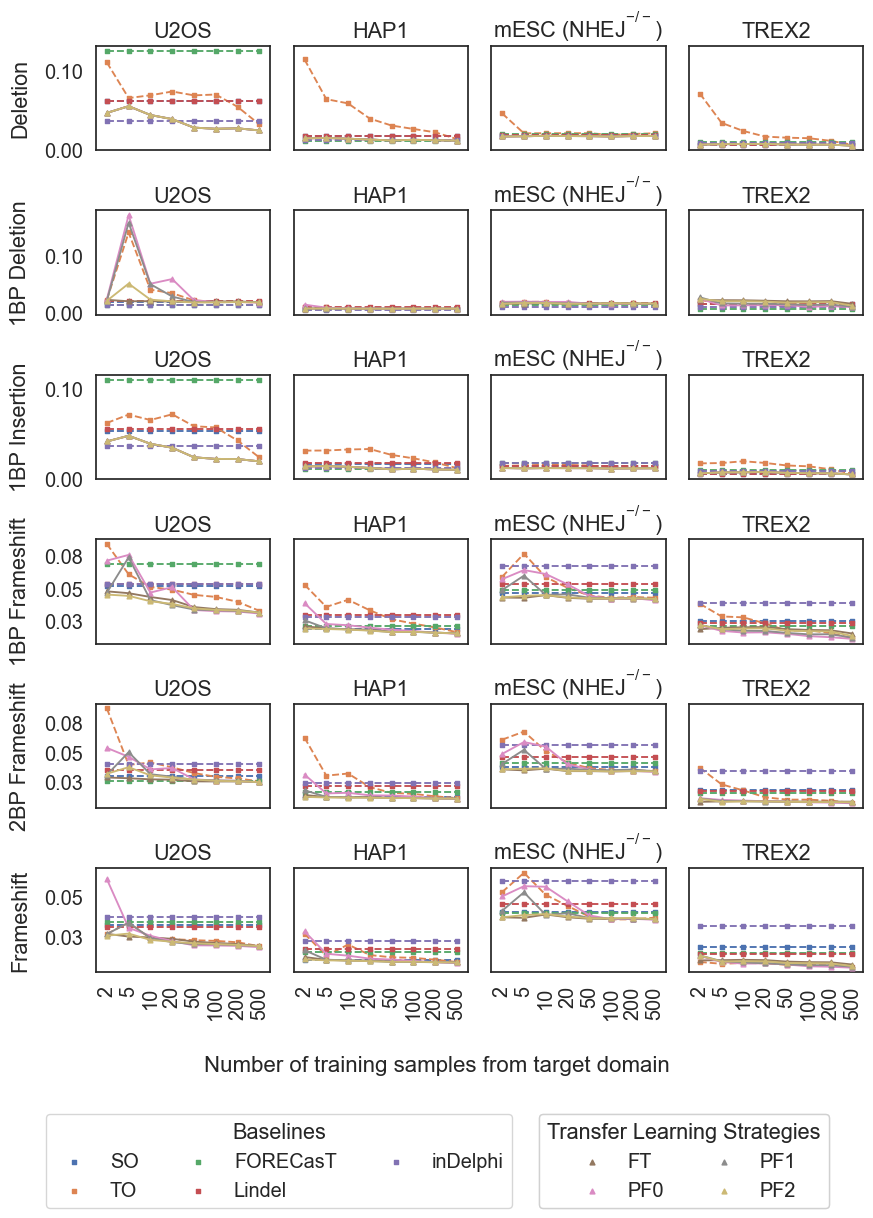

In [30]:

common_labels = {
    "X-CRISP": "SO",
    "Random Initialisation": "TO",
    "FORECasT": "FORECasT",
    "Lindel": "Lindel",
    "inDelphi": "inDelphi",
    "Pretrained: Fine-tuning only": "FT",
    "Pretrained: Weight Initialisation": "PF0",
    "Pretrained: One Frozen Layer": "PF1",
    "Pretrained: Two Frozen Layers": "PF2",  
}

custom_palette = {}
for i, l in enumerate(common_labels.values()):
    custom_palette[l] = sns.color_palette(palette="deep")[i]

title_mapping = {
   "inDelphi U2OS WT" : "U2OS", 
   "FORECasT HAP1 WT": "HAP1",  
   "inDelphi mECS -NHEJ" : 'mESC ($\it{\mathregular{NHEJ^{-/-}}}$)', 
   "FORECasT TREX WT" : "TREX2"
}

datasets = ['inDelphi U2OS WT', 'FORECasT HAP1 WT', 'inDelphi mECS -NHEJ', 
       'FORECasT TREX WT']

sns.set(font_scale=1.3)
sns.set_style("white")

fig, axes = plt.subplots(6, 4, sharex=True, sharey="row", figsize=(9, 11))

linestyles = ((["--"] * 5) + (["-"] * 4)) 
markers = (([","] * 5) + (["^"] * 4)) 


def format_two_decimals(value, pos):
    return f"{value:.2f}"

d_overall = {}
for i, dataset in enumerate(datasets):
    for j, stat in enumerate(all_stats):
        p = sns.pointplot(data=dstats[dstats.Dataset == dataset], x="Num Samples", y=stat, ax=axes[j, i],\
            hue="Method", palette=custom_palette, estimator=np.mean,\
            errorbar=None,\
            hue_order=list(common_labels.values()),\
            linestyles=linestyles ,\
            markers=markers, scale=0.5 ,\
        )
        p.get_legend().remove()
        p.set_title(title_mapping[dataset])
        p.set_ylabel("" if i > 0 else stat, labelpad=10)
        p.set_xlabel("")
        p.yaxis.set_major_formatter(FuncFormatter(format_two_decimals))

        if j == 5:
            p.set_xticklabels(p.get_xticklabels(), rotation=90, ha='right', rotation_mode='anchor', verticalalignment='center')

fig.supxlabel("Number of training samples from target domain", fontsize=16)

handles, labels = axes[0,0].get_legend_handles_labels() 
legend1 = fig.legend(handles[5:], labels[5:], loc='lower center', ncol=2, bbox_to_anchor=(0.775, -0.12), title="Transfer Learning Strategies")
fig.legend(handles[:5], labels[:5], loc='lower center', ncol=3, bbox_to_anchor=(0.325, -0.12), title="Baselines")

plt.gca().add_artist(legend1)

plt.tight_layout()
plt.savefig(f"./artifacts/transfer_learning_stats.pdf",  bbox_inches='tight')
plt.show()